In [1]:
#Imports
from numpy.core.multiarray import concatenate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer ,SimpleImputer,IterativeImputer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Getting the files needed
test_data = pd.read_csv('/content/drive/MyDrive/FMLAssignment2024/test.csv')
training_data1 = pd.read_csv('/content/drive/MyDrive/FMLAssignment2024/training1.csv')
training_data2 = pd.read_csv('/content/drive/MyDrive/FMLAssignment2024/training2.csv')

In [ ]:
training_data2.head()
test_data.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.374,GIST.375,GIST.376,GIST.377,GIST.378,GIST.379,GIST.380,GIST.381,GIST.382,GIST.383
0,NaN,0.2334,0.0,NaN,0.79188,0.0000,NaN,0.0000,0.43900,0.00000,...,0.009773,NaN,0.011548,NaN,0.017014,NaN,0.020395,NaN,0.007909,0.024576
1,0.45386,0.0000,NaN,NaN,0.00000,1.1775,0.0,0.0000,0.42297,2.02510,...,0.009820,0.026096,0.039678,NaN,0.057236,0.023440,NaN,0.014737,0.013860,0.058389
2,0.00000,0.0000,0.0,0.0,0.00000,0.0000,0.0,0.0000,0.00000,0.31986,...,NaN,NaN,0.026954,0.050490,NaN,NaN,NaN,0.021365,0.027606,0.031131
3,0.22014,NaN,0.0,NaN,0.88192,1.0936,NaN,0.0000,0.00000,0.00000,...,0.007899,0.023398,NaN,0.022786,NaN,0.007288,0.043885,NaN,0.011621,0.022733
4,NaN,0.0000,NaN,NaN,0.00000,0.0000,0.0,1.7938,0.00000,0.00000,...,0.012921,NaN,0.019792,0.019010,0.003771,0.003214,0.001543,NaN,0.003199,NaN


In [ ]:
#Process data first
#Stratified sampling to training data
train1, train2= training_data1.iloc[:500, :-2].values, training_data2.iloc[:500, :-2].values
labels1, labels2= training_data1.iloc[:500, :-2: -1].values, training_data2.iloc[:500, -2: -1].values
all_train1, all_train2 = training_data1.iloc[:,:-2].values, training_data2.iloc[:,:-2].values

# Split into CNN and Gist features
CNN_features_training1 = training_data1.iloc[:500, :3072].values
CNN_features_training2 = training_data2.iloc[:500, :3072].values
Gist_features_training1 = training_data1.iloc[:500, 3072:].values
Gist_features_training2 = training_data2.iloc[:500, 3072:].values

# Label the data and get confidence
labels_training1, labels_test1 = training_data1.iloc[:, -2:-1].values, test_data.iloc[:, -2:-1].values
labels_training2, labels_test2 = training_data2.iloc[:, -2:-1].values, training_data2.iloc[:, -2:-1].values
confidence_training1, confidence_test1 = training_data1.iloc[:, -1:].values, test_data.iloc[:, -1:].values
confidence_training2, confidence_test2 = training_data2.iloc[:, -1:].values, training_data2.iloc[:, -1:].values

#selectKbest feature selection
k_best_training1 = SelectKBest(chi2, k=100).fit_transform(all_train1, labels_training1.ravel())
k_best_test1 = SelectKBest(chi2, k=100).fit_transform(all_train1, labels_training1.ravel())

#correlation analysis
# Assuming x_train1, x_test1 are your training and test data after SelectKBest
selected_features_training1 = SelectKBest(chi2, k=100).fit_transform(all_train1, labels_training1.ravel())
selected_features_test1 = SelectKBest(chi2, k=100).fit_transform(all_train1, labels_training1.ravel())

print(test_data.isnull().sum())
print(training_data1.isnull().sum())

CNNs        215
CNNs.1      186
CNNs.2      185
CNNs.3      225
CNNs.4      214
           ... 
GIST.379    201
GIST.380    212
GIST.381    217
GIST.382    201
GIST.383    199
Length: 3456, dtype: int64
CNNs          0
CNNs.1        0
CNNs.2        0
CNNs.3        0
CNNs.4        0
             ..
GIST.381      0
GIST.382      0
GIST.383      0
label         0
confidence    0
Length: 3458, dtype: int64


In [ ]:
#useful functions
def datascaler1(x_train1):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train1)
    return x_train_scaled

In [ ]:
#data scaling which is necessary
scaled_training1 = datascaler1(training_data1.iloc[:,:-2].values)
scaled_training2 = datascaler1(training_data2.iloc[:,:-2].values)

In [ ]:
#imputation, simple then Knn
# Simple imputation
simple_imputed = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_training1_simple = simple_imputed.fit_transform(scaled_training1)
imputed_training2_simple = simple_imputed.fit_transform(scaled_training2)

#KNN imputation
imputerknn10 = KNNImputer(n_neighbors=10, weights="uniform",missing_values=np.nan)
imputerknn10.fit(imputed_training1_simple)
knn_training1 = imputerknn10.transform(imputed_training1_simple)
knn_training2 = imputerknn10.transform(imputed_training2_simple)

In [ ]:
#Model evaluation function
def model_evaluate(clf, x_train, y_train, cv = 5):
    results = []
    scores = []
    # Initialize StratifiedKFold
    kf = StratifiedKFold(n_splits=cv)

    for train_index, test_index in kf.split(x_train, y_train):
        X_train, X_test = x_train[train_index], x_train[test_index]
        y_train, y_test = y_train[train_index], y_train[test_index]
        #fitting the classifier
        clf.fit(X_train, y_train.ravel())
        #score calculation
        score = clf.score(X_test, y_test)
        results.append(score)
    #Mean and standard dev calc
    mean = np.mean(scores)
    std = np.std(scores)
    # Append mean and std to results
    results.append((mean, std))
    return results




In [ ]:
#Single layer perceptron Hyper parameter tuning
# Define the parameter grid
param_grid_perceptron = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300, 400, 500],
}

# Create the Perceptron classifier
perceptron = Perceptron()

# Perform GridSearchCV
grid_search_perceptron = HalvingGridSearchCV(perceptron, param_grid_perceptron, cv=5)
grid_search_perceptron.fit(all_train1, labels_training1.ravel())

# Get the best estimator
best_perceptron = grid_search_perceptron.best_estimator_

#print best parameters
print("Best Hyperparameters:", grid_search_perceptron.best_params_)
#print best estimator:
print("Best Estimator:", grid_search_perceptron.best_estimator_)
#print best score
print("Best Score:", grid_search_perceptron.best_score_)
#print summary of the results
cv_results = pd.DataFrame(grid_search_perceptron.cv_results_)
print("Grid Search CV Results:\n", cv_results)


Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'l1'}
Best Estimator: Perceptron(alpha=0.001, max_iter=100, penalty='l1')
Best Score: 0.711111111111111
Grid Search CV Results:
     iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0      0           20       0.007238      0.000765         0.000997   
1      0           20       0.003287      0.000103         0.000949   
2      0           20       0.005504      0.000273         0.000724   
3      0           20       0.005507      0.000316         0.000696   
4      0           20       0.002605      0.000068         0.000650   
..   ...          ...            ...           ...              ...   
82     2          180       0.078756      0.009197         0.001465   
83     2          180       0.082928      0.011384         0.001517   
84     2          180       0.083830      0.026000         0.002742   
85     2          180       0.067235      0.003275         0.001585   
86     2          180  

In [ ]:
#Hyper Parameter Tuning My Custom Classifier (Random Forest)
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [None, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'max_features':['sqrt', 'log2', None],
    'class_weight':['balanced', 'balanced_subsample',None]}

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=0)

# Perform grid search
hp_random_forest = HalvingGridSearchCV(random_forest, param_grid_rf, cv=5, max_resources='auto')
hp_random_forest.fit(all_train1, labels_training1.ravel())

# Store results in a DataFrame
results_rf = pd.DataFrame(hp_random_forest.cv_results_)

# Print best hyperparameters
print("Best Hyperparameters: ", hp_random_forest.best_estimator_)




Best Hyperparameters:  RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', n_estimators=50, random_state=0)


In [ ]:
import csv
#final Random Forest classifier
scaled_training = datascaler1(all_train1)

# Create and fit the SimpleImputer to the specific training data
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_training = simple_imputer.fit(scaled_training)

#transform the testing data to use
test_imputed = imputed_training.transform(test_data)

#flatten confidence training data
confidence_training1= confidence_training1.flatten()

#create our classifier with the hyperparameters
final_classifier = RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', n_estimators=50, random_state=0)

final_classifier.fit(scaled_training, labels_training1.ravel(), confidence_training1.ravel())

# Predictions
pred_class = final_classifier.predict(test_imputed)

# Assuming pred_class is your array of predictions
predictions_df = pd.DataFrame(pred_class, columns=['Predictions'])

# Save predictions to CSV file
#predictions_df.to_csv('/content/drive/MyDrive/FMLAssignment2024/predictions.csv', index=False)






/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# Define the classifier
clf = final_classifier

# Define the training data (scaled_training and labels_training1 should be defined before)
x_train = scaled_training
y_train = labels_training1.ravel()

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the classifier
results = []
for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
    X_train, X_test = x_train[train_index], x_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    clf.fit(X_train, y_train_cv)
    score = clf.score(X_test, y_test_cv)
    results.append(score)

# Print the results
print("Results of model evaluation:")
for i, result in enumerate(results):
    print(f"Fold {i+1}: Score={result}")

Results of model evaluation:
Fold 1: Score=0.725
Fold 2: Score=0.6625
Fold 3: Score=0.7625
Fold 4: Score=0.7875
Fold 5: Score=0.775


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Process completed in [100] epochs
Classification accuracy = 52
Confusion Matrix:
 [[33 12]
 [16 19]]


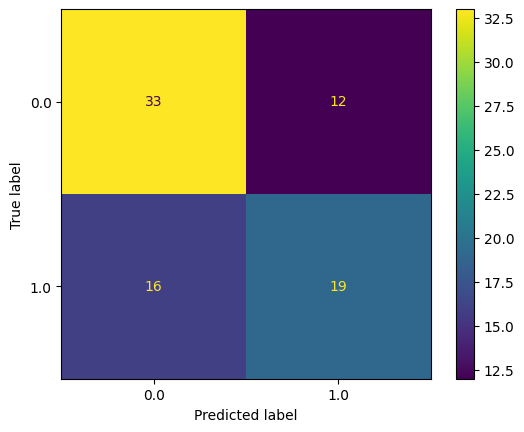

In [ ]:
#using logistic regression
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(all_train1, labels_training1, test_size=0.2, random_state=42)
logistic = LogisticRegression()

logistic.fit(x_train, y_train)

pred_class = logistic.predict(x_test)

print(f"Process completed in {logistic.n_iter_} epochs")
print(f"Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False))}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred_class)}")
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class))


Process completed in 17 epochs
Classification accuracy = 44
Confusion Matrix:
 [[25 20]
 [16 19]]
Final weights are: 0.05566300000000041, 1.789518999999999, -10.0



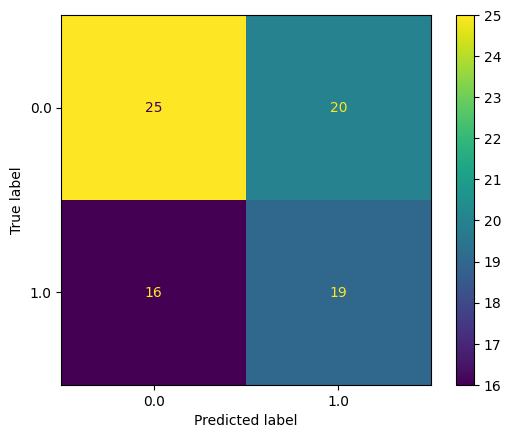

In [ ]:
#Using the Single Layer percpetron on my data
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(all_train1, labels_training1, test_size=0.2, random_state=42)
perceptron = Perceptron()

perceptron.fit(x_train, y_train.ravel())

pred_class = perceptron.predict(x_test)

print(f"Process completed in {perceptron.n_iter_} epochs")
print(f"Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False))}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred_class)}")
print(f"Final weights are: {perceptron.coef_[0][0]}, {perceptron.coef_[0][1]}, {perceptron.intercept_[0]}\n")
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class))



Process completed in 61 epochs
Classification accuracy = 54
Confusion Matrix:
 [[35 10]
 [16 19]]


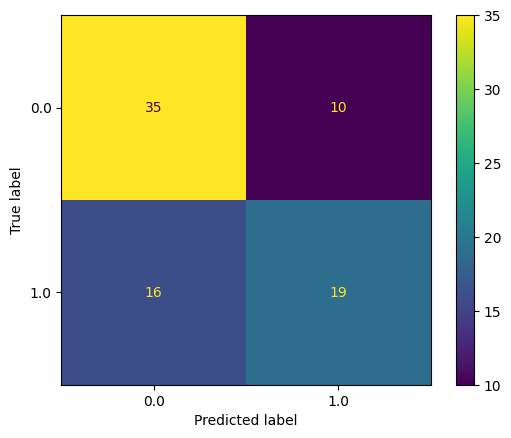

In [ ]:
#Multi layer perceptron

x_train, x_test, y_train, y_test = train_test_split(all_train1, labels_training1, test_size=0.2, random_state=42)
mlp = MLPClassifier()

mlp.fit(x_train, y_train.ravel())

pred_class = mlp.predict(x_test)

print(f"Process completed in {mlp.n_iter_} epochs")
print(f"Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False))}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred_class)}")
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class))


Classification accuracy = 0.7625
Confusion Matrix:
[[33 12]
 [ 7 28]]


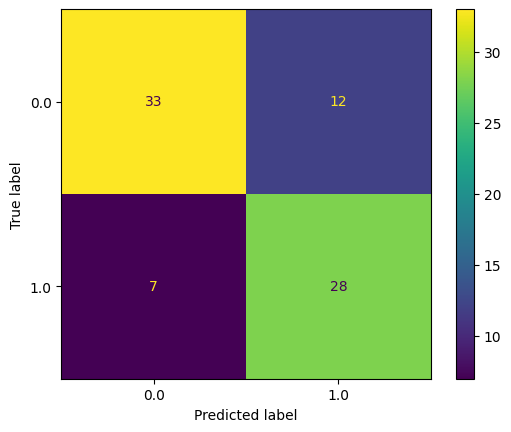

In [ ]:
#rand0om forest testing
x_train, x_test, y_train, y_test = train_test_split(all_train1, labels_training1, test_size=0.2, random_state=42)

# Create and train Random Forest Classifier
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train.ravel())

# Make predictions
pred_class = random_forest.predict(x_test)

print(f"Classification accuracy = {accuracy_score(y_test, pred_class)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_class)}")
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class))


Process completed in [393] epochs
Classification accuracy = 59
Confusion Matrix:
 [[35 10]
 [11 24]]


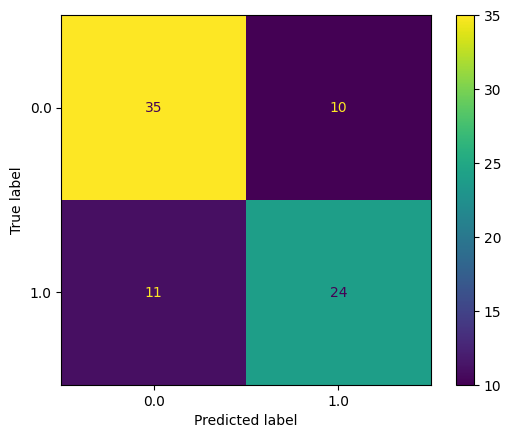

In [ ]:
#support vector machine testing

x_train, x_test, y_train, y_test = train_test_split(all_train1, labels_training1, test_size=0.2, random_state=42)
vector = svm.SVC()

vector.fit(x_train, y_train.ravel())

pred_class = vector.predict(x_test)

print(f"Process completed in {vector.n_iter_} epochs")
print(f"Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False))}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred_class)}")
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class))



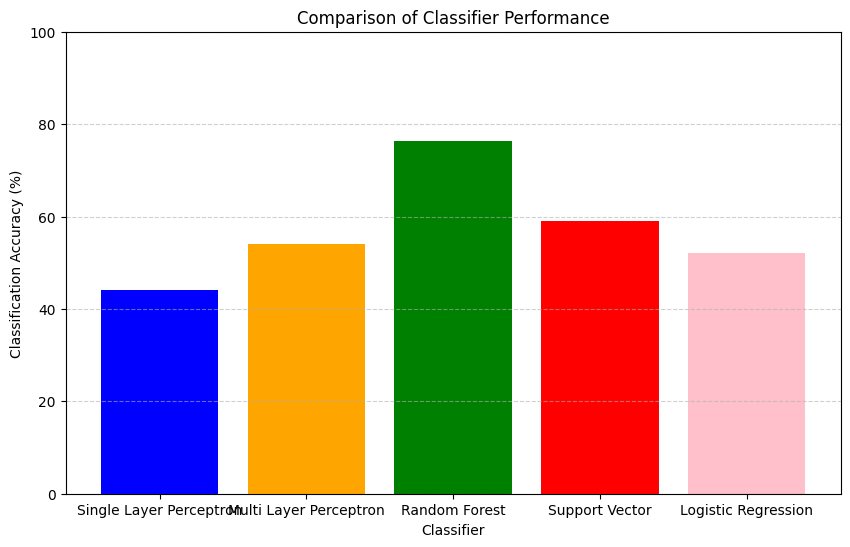

In [ ]:
# Classifier names
classifiers = ['Single Layer Perceptron', 'Multi Layer Perceptron', 'Random Forest', 'Support Vector', 'Logistic Regression']

# Classification accuracies
accuracies = [44, 54, 76.25, 59, 52]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'pink'])
plt.xlabel('Classifier')
plt.ylabel('Classification Accuracy (%)')
plt.title('Comparison of Classifier Performance')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

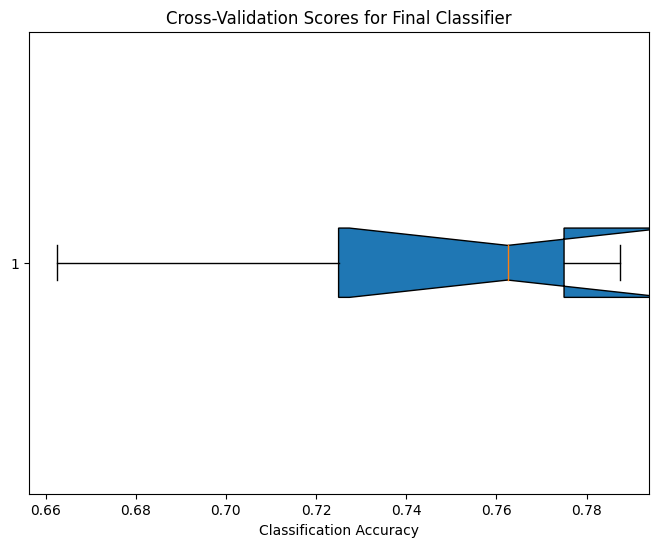

In [ ]:
# Scores for each fold
scores = [0.725, 0.6625, 0.7625, 0.7875, 0.775]

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(scores, patch_artist=True, notch=True, vert=0)
plt.xlabel('Classification Accuracy')
plt.title('Cross-Validation Scores for Final Classifier')
plt.show()